In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
import scipy as sp
import seaborn as sns
import math
import pandas as pd
from scipy import linalg as la

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats.distributions import norm

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
x = np.array([x1,x2,x3])
c = np.cov(x)
l,V = la.eig(c)
print('eigenvalues = ',l)
print('eigenvectors = ','\n',V)

eigenvalues =  [ 2.68986823e+01+0.j -1.07039063e-15+0.j  2.00547525e+00+0.j]
eigenvectors =  
 [[-0.1151059  -0.81649658  0.56575964]
 [-0.57780531 -0.40824829 -0.706735  ]
 [-0.80801711  0.40824829  0.42478427]]


In [3]:
U, spectrum, Vt = la.svd(x)
print('eigenvectors','\n',U)
#print('spectrum','\n',spectrum)
print('eigenvalues = ',spectrum**2/1000)
#print('Vt','\n',Vt)

eigenvectors 
 [[-0.11518493  0.56574355 -0.81649658]
 [-0.57770659 -0.7068157  -0.40824829]
 [-0.80807644  0.4246714   0.40824829]]
eigenvalues =  [2.68902617e+01 2.00412324e+00 4.69087216e-32]


In [4]:
l, V = np.linalg.eig(c)
Lambda=np.diag(l)
print (Lambda)
x1_var = (Lambda[0,0])/Lambda.trace()
x2_var = (Lambda[1,1])/Lambda.trace()
x3_var = (Lambda[2,2])/Lambda.trace()
print('Percent of the total dataset variability of x1 ',x1_var*100,'%')
print('Percent of the total dataset variability of x2 ',x2_var*100,'%')
print('Percent of the total dataset variability of x3 ',x3_var*100,'%')
print('Yes it makes sense as both x2 and x3 depend on x1')

print ('Percent of the total dataset variability of eigenvalues',Lambda[0,0],'and',Lambda[2,2],'is',(Lambda[0,0]+Lambda[2,2])/Lambda.trace()*100,'%')

[[ 2.68986823e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.07039063e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.00547525e+00]]
Percent of the total dataset variability of x1  93.0616374278469 %
Percent of the total dataset variability of x2  -3.703241064618599e-15 %
Percent of the total dataset variability of x3  6.938362572153093 %
Yes it makes sense as both x2 and x3 depend on x1
Percent of the total dataset variability of eigenvalues 26.898682328025547 and 2.0054752512785896 is 100.0 %


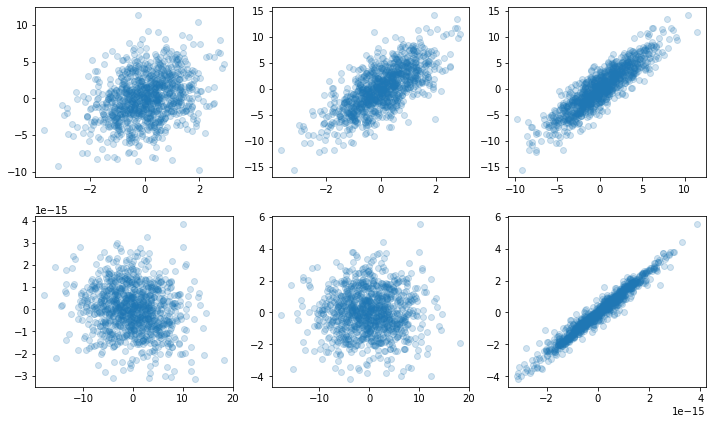

In [5]:
fig, ax = plt.subplots(nrows = 2, ncols = 3,figsize = (10,6) )

ax[0,0].scatter(x[0,:], x[1,:], alpha=0.2)
ax[0,1].scatter(x[0,:], x[2,:], alpha=0.2)
ax[0,2].scatter(x[1,:], x[2,:], alpha=0.2)

xpp = np.dot(V.T,x)
ax[1,0].scatter(xpp[0,:], xpp[1,:], alpha=0.2)
ax[1,1].scatter(xpp[0,:], xpp[2,:], alpha=0.2)
ax[1,2].scatter(xpp[1,:], xpp[2,:], alpha=0.2)
fig.tight_layout()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [6]:
X2 = x 
for i in range(0,10):
    xc = np.random.normal(0, 1/50, N)
    X2 = np.vstack([X2,xc])
C2 = np.cov(X2)    
l2,V2 = la.eig(C2)
Lambda2=np.diag(l2)

In [7]:
num_rows, num_cols = X2.shape
for i in range(0,num_rows):
    x_var = (Lambda2[i,i])/Lambda2.trace()
    print('Percent of the total dataset variability of feature',i+1,'=',np.real(x_var*100),'%')
print ('Percent of the total dataset variability of eigenvalues',np.real(Lambda2[0,0]),'and',np.real(Lambda2[1,1]),'is',np.real((Lambda2[0,0]+Lambda2[1,1])/Lambda2.trace()*100),'%') 
print('Despite the presence of noise, the result is the same as before')

Percent of the total dataset variability of feature 1 = 93.0492688897321 %
Percent of the total dataset variability of feature 2 = 6.9374466400123485 %
Percent of the total dataset variability of feature 3 = -7.339768474833031e-16 %
Percent of the total dataset variability of feature 4 = 0.001077590828696921 %
Percent of the total dataset variability of feature 5 = 0.001586450628287951 %
Percent of the total dataset variability of feature 6 = 0.001173549598871547 %
Percent of the total dataset variability of feature 7 = 0.001199983712780457 %
Percent of the total dataset variability of feature 8 = 0.0014902946559328567 %
Percent of the total dataset variability of feature 9 = 0.0014219777613640506 %
Percent of the total dataset variability of feature 10 = 0.0014326199207623993 %
Percent of the total dataset variability of feature 11 = 0.0013464249831816172 %
Percent of the total dataset variability of feature 12 = 0.00127474647010038 %
Percent of the total dataset variability of featur

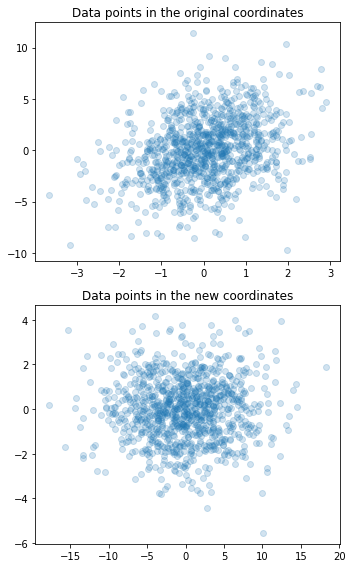

In [8]:
fig2, ax2 = plt.subplots(nrows = 2, ncols = 1,figsize = (5,8),squeeze=False)

ax2[0,0].scatter(X2[0,:], X2[1,:], alpha=0.2)
ax2[0,0].set_title('Data points in the original coordinates')

Xpp2 = np.dot(V2.T,X2)
ax2[1,0].scatter(Xpp2[0,:], Xpp2[1,:], alpha=0.2)
ax2[1,0].set_title('Data points in the new coordinates')
fig2.tight_layout()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 